In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [7]:
cols = ["bedrooms","sqft_living","grade"]
X = df[cols]
y = df["price"]

In [8]:
X.head()

,bedrooms,sqft_living,grade
0,3,1180,7
1,3,2570,7
2,2,770,6
3,4,1960,7
4,3,1680,8


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42) #random_state creates a pattern for the randomization any number can be used

In [11]:
X_train.head()

,bedrooms,sqft_living,grade
6325,3,1780,9
13473,2,1000,6
17614,3,1080,6
16970,3,2090,7
20868,2,1741,8


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
#define the model
model = LinearRegression()

#fit the model to training data
model.fit(X_train, y_train)

# predict (model validation)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [15]:
print("The R^2 score for the training data is: ",r2_score(y_train, y_train_pred))
print("The R^2 score for the test data is: ",r2_score(y_test, y_test_pred))

The R^2 score for the training data is:  0.5406369012623162
The R^2 score for the test data is:  0.5466254231756571


In [16]:
#calculates the average error of the predicted price and actual price
print("The train RMSE is: ", mean_squared_error(y_train, y_train_pred)**0.5)
print("The train RMSE is: ", mean_squared_error(y_test, y_test_pred)**0.5)

The train RMSE is:  244979.90133695066
The train RMSE is:  261800.83641032892


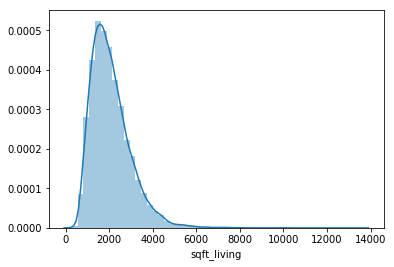

In [17]:
# feature engineering - create a feature that doesn't exist in the data set (calculations, segmentation, grouping, classification)
import seaborn as sns

sns.distplot(df["sqft_living"])

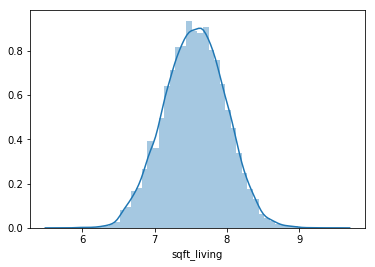

In [19]:
# use data transformations to normalize the data
#log (logarithm), normalization, standardization

sns.distplot(np.log(df["sqft_living"]))

In [20]:
# Central tendency (mean, median, mode) should be similar

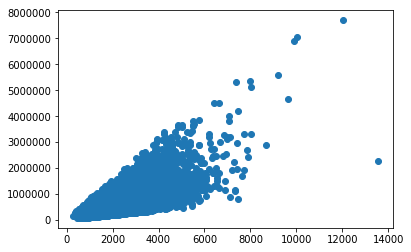

In [21]:
plt.scatter(df["sqft_living"], df["price"])

In [23]:
#feature engineering
df["sqft_ratio"] = df["sqft_living"]/df["sqft_living15"]

In [31]:
#convert columns in categorical variables

col = ["bathrooms","sqft_living","sqft_ratio","grade","zipcode"]
X = df[col]
y = df["price"]

In [32]:
X.head()

,bathrooms,sqft_living,sqft_ratio,grade,zipcode
0,1.00,1180,0.880597,7,98178
1,2.25,2570,1.520710,7,98125
2,1.00,770,0.283088,6,98028
3,3.00,1960,1.441176,7,98136
4,2.00,1680,0.933333,8,98074


In [33]:
X = pd.get_dummies(X, columns=["zipcode"])

In [34]:
X.head()

,bathrooms,sqft_living,sqft_ratio,grade,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,1180,0.880597,7,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.25,2570,1.520710,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.00,770,0.283088,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,1960,1.441176,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,1680,0.933333,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42) #random_state creates a pattern for the randomization any number can be used

In [36]:
#define the model
model = LinearRegression()

#fit the model to training data
model.fit(X_train, y_train)

# predict (model validation)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
print("The R^2 score for the training data is: ",r2_score(y_train, y_train_pred))
print("The R^2 score for the test data is: ",r2_score(y_test, y_test_pred))
#calculates the average error of the predicted price and actual price
print("The train RMSE is: ", mean_squared_error(y_train, y_train_pred)**0.5)
print("The train RMSE is: ", mean_squared_error(y_test, y_test_pred)**0.5)

The R^2 score for the training data is:  0.7530258659258542
The R^2 score for the test data is:  0.7478565208285828
The train RMSE is:  179629.69757107005
The train RMSE is:  195238.8849541506


In [38]:
#create a flag "is_renovated"
df["is_renovated"] = df["yr_renovated"].map(lambda x: 0 if x == 0 else 1)

In [39]:
df["is_renovated"].value_counts()

0    20699
1      914
Name: is_renovated, dtype: int64

In [40]:
#dummies, onehotencoding

In [41]:
#create a flag "is_renovated"
df["has_basement"] = df["sqft_basement"].map(lambda x: 0 if x == 0 else 1)

In [42]:
df["has_basement"].value_counts()

0    13126
1     8487
Name: has_basement, dtype: int64

In [43]:
#check coeficients
model.coef_

array([-9.28686543e+03,  2.44565962e+02, -1.29636544e+05,  5.00731615e+04,
       -5.04388168e+13, -5.04388167e+13, -5.04388168e+13, -5.04388160e+13,
       -5.04388165e+13, -5.04388165e+13, -5.04388166e+13, -5.04388165e+13,
       -5.04388167e+13, -5.04388167e+13, -5.04388167e+13, -5.04388167e+13,
       -5.04388167e+13, -5.04388168e+13, -5.04388166e+13, -5.04388166e+13,
       -5.04388167e+13, -5.04388166e+13, -5.04388168e+13, -5.04388168e+13,
       -5.04388168e+13, -5.04388164e+13, -5.04388166e+13, -5.04388168e+13,
       -5.04388155e+13, -5.04388162e+13, -5.04388168e+13, -5.04388167e+13,
       -5.04388166e+13, -5.04388166e+13, -5.04388167e+13, -5.04388167e+13,
       -5.04388168e+13, -5.04388167e+13, -5.04388167e+13, -5.04388166e+13,
       -5.04388167e+13, -5.04388166e+13, -5.04388166e+13, -5.04388167e+13,
       -5.04388168e+13, -5.04388163e+13, -5.04388164e+13, -5.04388163e+13,
       -5.04388166e+13, -5.04388164e+13, -5.04388166e+13, -5.04388163e+13,
       -5.04388162e+13, -

In [46]:
pd.DataFrame({"true_values":y_train, "predicted":y_train_pred,"price_diff": y_train - y_train_pred})

,predicted,price_diff,true_values
6325,3.882331e+05,-63233.078125,325000.0
13473,2.391075e+05,17892.492188,257000.0
17614,2.057609e+05,22739.085938,228500.0
16970,3.000008e+05,-12000.781250,288000.0
20868,5.086092e+05,-29609.164062,479000.0
8993,5.624873e+05,-102587.328125,459900.0
10432,4.644799e+05,-14979.882812,449500.0
10163,8.007169e+05,-31716.851562,769000.0
17889,6.197118e+05,60288.226562,680000.0
13246,2.218727e+05,71627.296875,293500.0


In [47]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [49]:
#define the model
lasso = Lasso(random_state=42)
             
#for the model to the data
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

RSME_lasso = mean_squared_error(y_test,y_pred_lasso)**0.5
r2_lasso = r2_score(y_test,y_pred_lasso)

print(RSME_lasso)
print(r2_lasso)

195240.52662411472
0.7478522805040512


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
#define the model
ridge = Ridge(random_state=42)
             
#for the model to the data
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

RSME_ridge = mean_squared_error(y_test,y_pred_ridge)**0.5
r2_ridge = r2_score(y_test,y_pred_ridge)

print(RSME_ridge)
print(r2_ridge)

195330.44413641177
0.7476199750811989


In [53]:
#define the model
en = ElasticNet(max_iter=100,l1_ratio=0.20,random_state=42)
             
#for the model to the data
en.fit(X_train, y_train)

y_pred_en = en.predict(X_test)

RSME_en = mean_squared_error(y_test,y_pred_en)**0.5
r2_en = r2_score(y_test,y_pred_en)

print(RSME_en)
print(r2_en)

266688.257514771
0.5295397972709975


In [55]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 8)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

RSME_knn = mean_squared_error(y_test,y_pred_knn)**0.5
r2_knn = r2_score(y_test,y_pred_knn)

print(RSME_knn)
print(r2_knn)

258474.7922097232
0.5580720257075873
